In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [3]:
path = r'C:\Users\goswa\Desktop\Pratham project folder 6'

In [4]:
df_UFC = pd.read_csv(r'C:\Users\goswa\Desktop\Pratham project folder 6\Prepared data\UFC_Clean.csv', index_col = False)

In [5]:
df_UFC.shape

(4540, 37)

In [6]:
%matplotlib inline

In [7]:
df_UFC.head()

,Unnamed: 0,r_fighter,b_fighter,fight_date,city,state,country,winner,weight_class,B_Past_wins,...,r_win_by_decision_unanimous,r_win_by_ko/tko,r_win_by_submission,r_win_by_tko_doctor_stoppage,r_stance,r_height_cms,r_Reach_cms,r_weight_lbs,b_age,r_age
0,0,Adrian Yanez,Gustavo Lopez,3/20/2021,Las Vegas,Nevada,United States of America,Red,Bantamweight,1,...,0,1,0,0,Orthodox,170.18,177.80,135,31,27
1,1,Trevin Giles,Roman Dolidze,3/20/2021,Las Vegas,Nevada,United States of America,Red,Middleweight,2,...,0,3,0,0,Orthodox,182.88,187.96,185,32,28
2,2,Tai Tuivasa,Harry Hunsucker,3/20/2021,Las Vegas,Nevada,United States of America,Red,Heavyweight,0,...,1,3,0,0,Southpaw,187.96,190.50,264,32,28
3,3,Cheyanne Buys,Montserrat Conejo,3/20/2021,Las Vegas,Nevada,United States of America,Blue,WomenStrawweight,0,...,0,0,0,0,Switch,160.02,160.02,115,28,25
4,4,Marion Reneau,Macy Chiasson,3/20/2021,Las Vegas,Nevada,United States of America,Blue,WomenBantamweight,4,...,1,2,2,0,Orthodox,167.64,172.72,135,29,43


In [8]:
df_UFC = df_UFC.drop(columns = ['Unnamed: 0'])

# 03 Use the elbow technique as shown in the Jupyter notebook for this Exercise.

In [10]:
sub = df_UFC[['r_height_cms', 'b_height_cms','r_win_by_ko/tko','b_win_by_ko/tko', 'r_weight_lbs', 'b_weight_lbs', 'b_age', 'r_age']]

In [11]:
#range of potential clusters
num_cl = range(1, 10)

# Defines k-means clusters in the range assigned above
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [12]:
score = [kmeans[i].fit(sub).score(sub) for i in range(len(kmeans))] 

score

C:\Users\goswa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\goswa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\goswa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\goswa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[-11521621.97416132,
 -4581177.131571651,
 -2309074.4331860403,
 -1509036.5704784894,
 -1116534.054617723,
 -982204.3437435739,
 -873854.3407235666,
 -810789.5082938139,
 -759827.1669256735]

# 04. Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart.


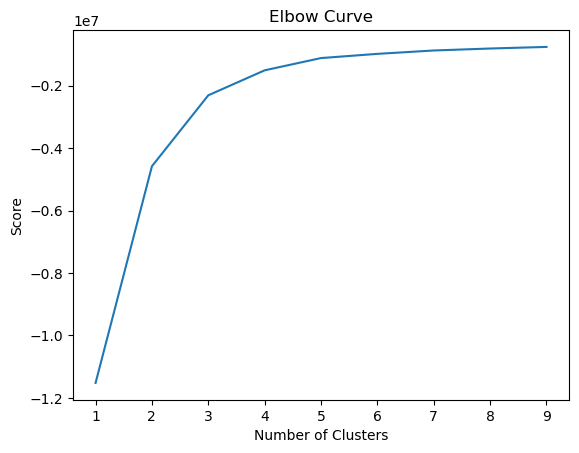

In [13]:
# Plot the elbow curve

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# The elbow, which marks the point where the curve starts to flatten, is evident as the curve transitions from two to three on the X-axis. Subsequently, there is a slight increase beyond three. This leads me to assert that the optimal number of clusters is three.

# 5 Run the k-means algorithm.


In [14]:
kmeans = KMeans(n_clusters = 3) 

In [15]:
# Fit the k-means object to the data.

kmeans.fit(sub)

C:\Users\goswa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [16]:
sub['clusters'] = kmeans.fit_predict(sub)

C:\Users\goswa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\goswa\AppData\Local\Temp\ipykernel_2228\3683309691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['clusters'] = kmeans.fit_predict(sub)


# 06. Attach a new column to your dataframe with the resulting clusters as shown in the Exercise. This will allow you to create a visualization using your clusters.

In [17]:
sub.head()

,r_height_cms,b_height_cms,r_win_by_ko/tko,b_win_by_ko/tko,r_weight_lbs,b_weight_lbs,b_age,r_age,clusters
0,170.18,165.10,1,0,135,135,31,27,1
1,182.88,187.96,3,1,185,205,32,28,0
2,187.96,187.96,3,0,264,241,32,28,2
3,160.02,152.40,0,0,115,115,28,25,1
4,167.64,180.34,2,2,135,135,29,43,1


In [18]:
# Check frequency of unique value in 'clusters' column

sub['clusters'].value_counts()

clusters
1    2185
0    1950
2     405
Name: count, dtype: int64

# 07. Create a few different visualizations (e.g., scatterplots) using your clustered data. Try plotting different variables against each other to see the results in terms of the clusters.

# AGE AND WEIGHT 


C:\Users\goswa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\goswa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\goswa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


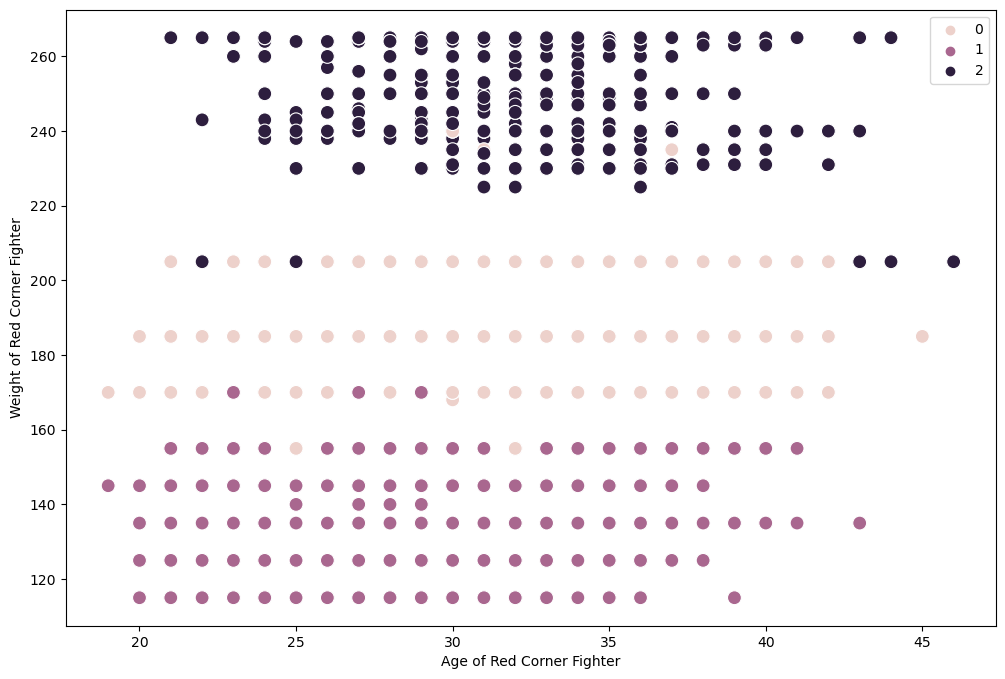

In [19]:
# clusters for r_age and r_weight_lbs

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = sub['r_age'], y = sub['r_weight_lbs'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('Age of Red Corner Fighter')
plt.ylabel('Weight of Red Corner Fighter')
plt.show()

C:\Users\goswa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\goswa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\goswa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


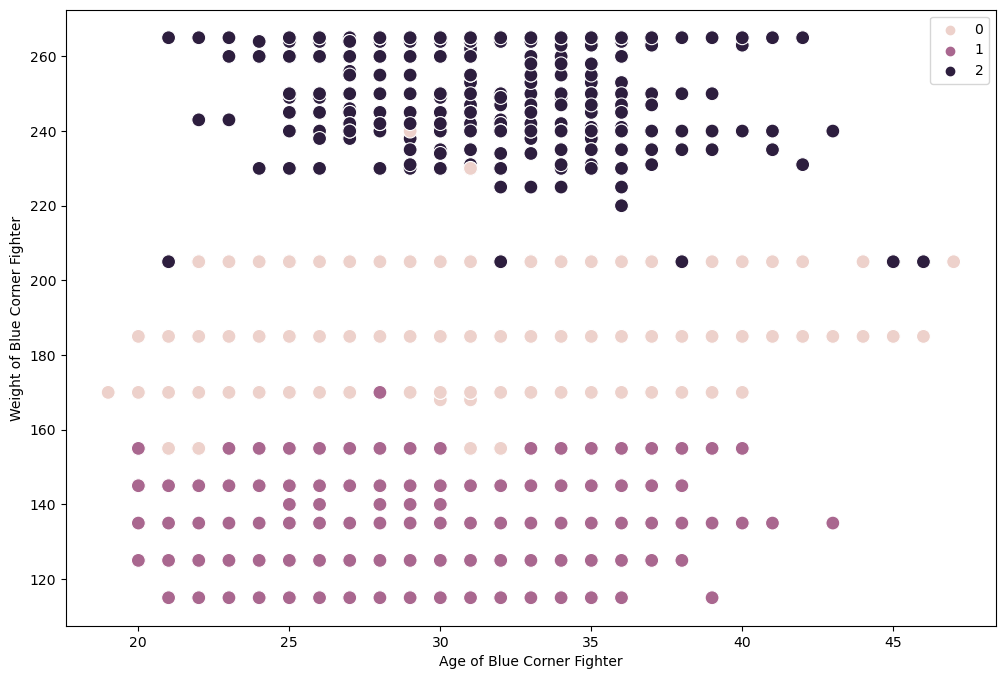

In [20]:
# clusters for b_age and b_weight_lbs

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = sub['b_age'], y = sub['b_weight_lbs'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('Age of Blue Corner Fighter')
plt.ylabel('Weight of Blue Corner Fighter')
plt.show()

# HIGHT AND WIN BY KO/TKO

C:\Users\goswa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\goswa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\goswa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


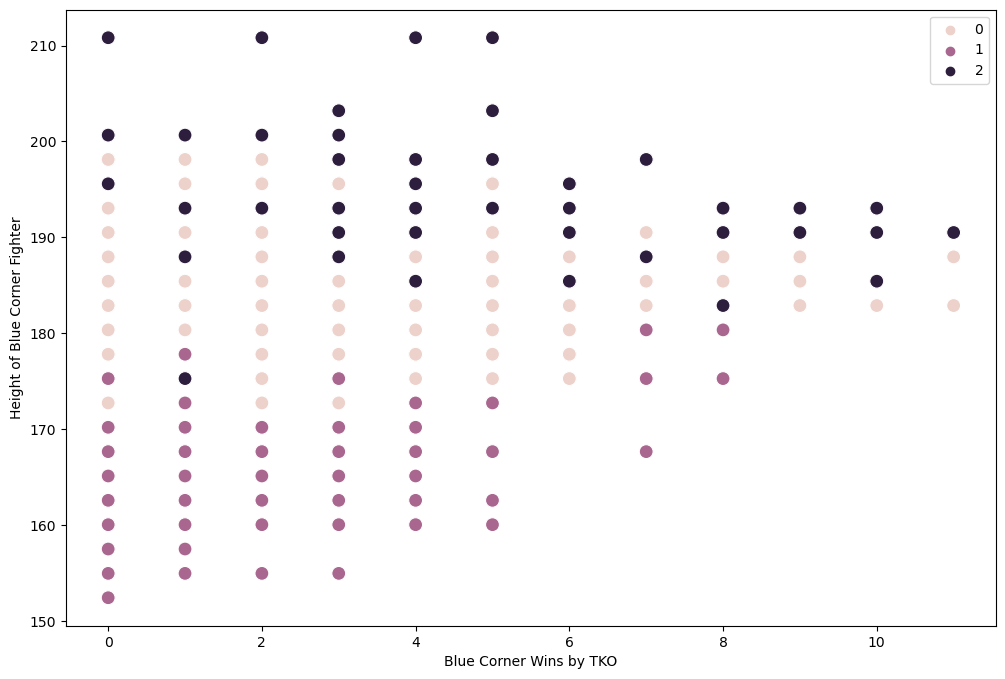

In [23]:
# plot hight of blue corner and blue corner wins by KO/TKO 

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = sub['b_win_by_ko/tko'], y = sub['b_height_cms'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('Blue Corner Wins by TKO')
plt.ylabel('Height of Blue Corner Fighter')
plt.show()

C:\Users\goswa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\goswa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\goswa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


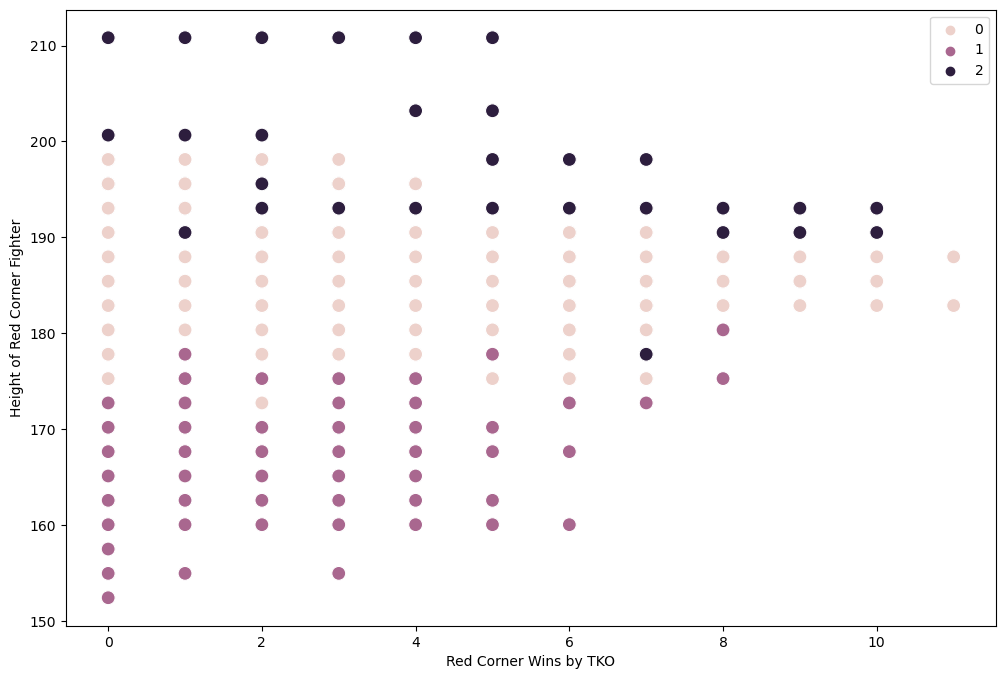

In [24]:
# plot hight of red corner and red corner wins by KO/TKO 

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = sub['r_win_by_ko/tko'], y = sub['r_height_cms'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('Red Corner Wins by TKO')
plt.ylabel('Height of Red Corner Fighter')
plt.show()

# AGE AND WIN BY KO/TKO

C:\Users\goswa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\goswa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\goswa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


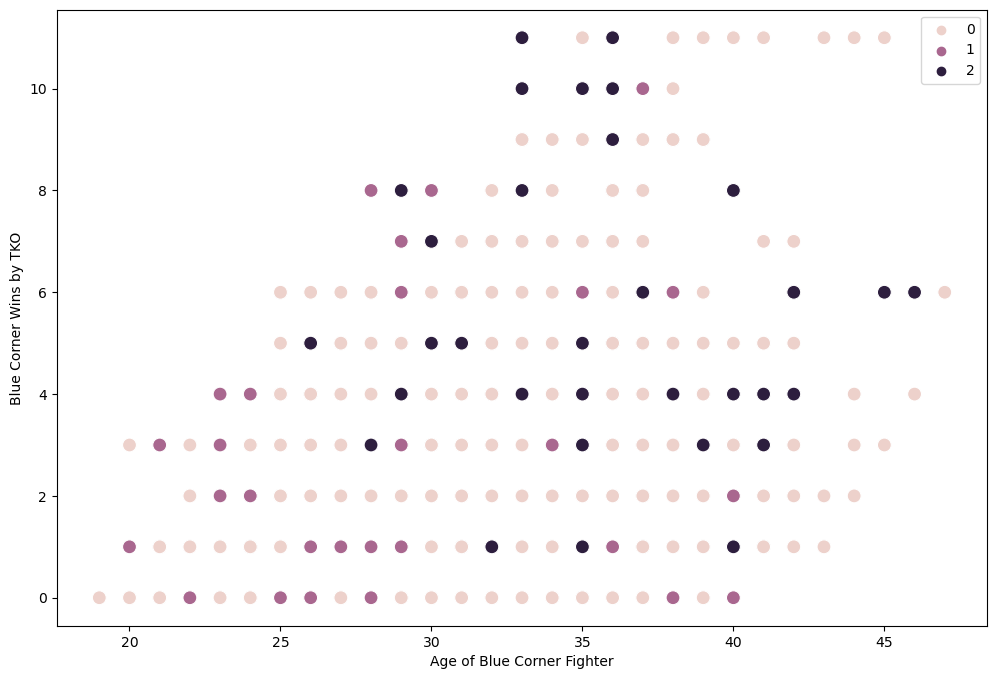

In [26]:
# Blue age and blue win by ko/tko
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = sub['b_age'], y = sub['b_win_by_ko/tko'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('Age of Blue Corner Fighter')
plt.ylabel('Blue Corner Wins by TKO')
plt.show()

C:\Users\goswa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\goswa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\goswa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


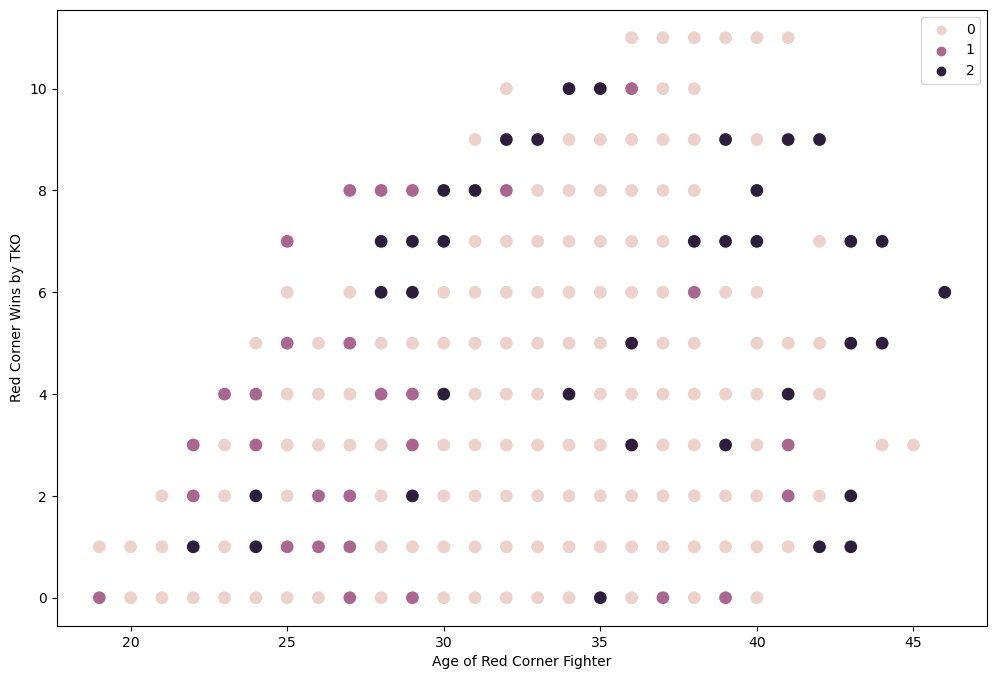

In [27]:
# Red age and win by TKO/KO
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = sub['r_age'], y = sub['r_win_by_ko/tko'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('Age of Red Corner Fighter')
plt.ylabel('Red Corner Wins by TKO')
plt.show()

# 08. Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further.

The UFC dataset is highly unpredictable due to constant changes in fighter variables. Fights, regardless of perceived skill levels, can result in unexpected outcomes like knockouts or TKOs.  The 2 cluster indicates significant weight differences in higher weight classes, while the 0 cluster, specific to fighters with required weights, shows less clustering and correlates with the highest average fights. Height extremes result in fewer TKO wins, with the 0 cluster standing out in the 180-190 cm range. Age and TKO clusters appear sporadic, with the 0 cluster showing the highest TKOs in the 35-45 age range, possibly indicating experience-related factors. Overall, interpreting the clustering is challenging, with groups 0, 1, and 2 spread across various ranges.

# 09. Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.

In [31]:
sub.loc[sub['clusters'] == 2, 'cluster'] = 'green'
sub.loc[sub['clusters'] == 1, 'cluster'] = 'purple'
sub.loc[sub['clusters'] == 0, 'cluster'] = 'orange'

In [32]:
sub.groupby('cluster').agg({'r_age':['mean', 'median'],'b_age':['mean', 'median'],'r_win_by_ko/tko':['mean', 'median'],'b_win_by_ko/tko':['mean', 'median'], 'r_weight_lbs':['mean', 'median'],'b_weight_lbs':['mean', 'median'],'r_height_cms':['mean', 'median'],'b_height_cms':['mean', 'median']})

r_age             b_age        r_win_by_ko/tko         \
              mean median       mean median            mean median   
cluster                                                              
green    32.279012   32.0  31.454321   31.0        2.790123    2.0   
orange   30.205641   30.0  29.767179   29.0        1.790256    1.0   
purple   29.157437   29.0  28.732723   29.0        1.010984    1.0   

        b_win_by_ko/tko        r_weight_lbs        b_weight_lbs         \
                   mean median         mean median         mean median   
cluster                                                                  
green          2.022222    1.0   247.661728  250.0   244.644444  249.0   
orange         1.267692    1.0   181.534872  185.0   181.096923  185.0   
purple         0.681007    0.0   141.130435  145.0   140.965675  145.0   

        r_height_cms         b_height_cms          
                mean  median         mean  median  
cluster                                            
green     190.543901  190.50   190.462370  190.50  
orange    183.507836  182.88   183.411446  182.88  
purple    171.981831  172.72   172.281748  172.72

Deciding the most accurate cluster for insights between mean and median range is challenging. The orange cluster seems reliable, but height variation in red and blue fighters differs from the closely aligned purple and green clusters. Also, the orange cluster has the highest variation in mean-to-median ratios for red and blue TKO/KO. This aligns with previous findings with the unpredictable nature of UFC.